# STUTERN ASSESSMENT ON IBM EMPLOYEE ATTRITION

## Libraries Import

In [12]:
# import all necessary libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Connecting to Database and Importing Data to Pandas

In [13]:
# Connect to SQLite database
con = sqlite3.connect('attr_data.db')

# reading the data into memory using pandas
df = pd.read_sql_query(
    "SELECT * FROM attrition_records",
    con,
    index_col='id'
)

## Data Exploration

In [104]:
# viewing the dataset
df
# the result shows that this dataset has 1470 rows and 35 columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3


In [133]:
# to get more info about the data in order to see if it is good for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 1470
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

the data does not contain null values hence requires no cleaning

In [8]:
# to gather info on the numerical data 
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploratory Data Analysis

### The following questions should be answered:

1. What do you think are the 3 factors behind employee attrition?
2. What is the relationship between Education and Monthly Income?
3. What is the effect of age on attrition?
4. Is Income the main factor towards employee attrition?
5. How does work-life balance impact the overall attrition rate?

### 1. What do you think are the 3 factors behind employee attrition?

According to [spiceworks](https://www.spiceworks.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/), 
Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced.

The reasons provided by [investopedia](https://www.investopedia.com/terms/a/attrition.asp) and [AIHR](https://www.aihr.com/blog/employee-attrition/#Causes) for employee attrition are as follows:
1. Unsatisfactory pay and/or benefits
2. Lack of opportunity
3. Poor workplace conditions
4. Poor work-life balance
5. Illness and death
6. Retirement
7. Relocation
8. Workforce demographics: If your company is filled with Baby Boomers (according to [usatoday](https://www.usatoday.com/story/news/2022/09/02/what-years-gen-x-millennials-baby-boomers-gen-z/10303085002/), Baby boomers are anyone born from 1946 to 1964.), their upcoming retirements may result in a loss of staff that you cannot easily replace. I believe that age is a factor to consider in this analysis.

Out of the 8 reasons given by investopedia and AIHR, as against our database, we have the following:
- Monthly Income (Unsatisfactory pay and/or benefits)
- JobInvolvement (Lack of opportunity)
- EnvironmentSatisfaction (Poor workplace conditions)
- WorkLifeBalance (Poor work-life balance), 
- Age (Workforce demographics)


I will be focusing three factors
- EnvironmentSatisfaction (Poor workplace conditions)
- WorkLifeBalance (Poor work-life balance),
- Age (Workforce demographics)

In [15]:
# we create a function to define the titles and labels for our graphs
def axis_title(xaxis, yaxis, title):
    plt.xlabel(xaxis, fontsize=14)
    plt.ylabel(yaxis, fontsize=12)
    plt.title(title, fontsize=12)


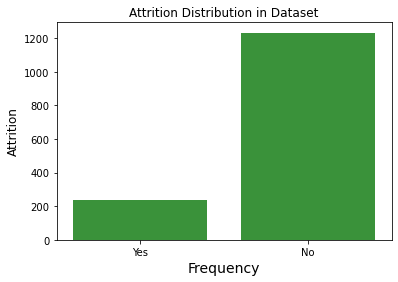

The total count of attrition for this dataset is: 
No     1233
Yes     237
Name: Attrition, dtype: int64

The percentage of attrition in the dataset is: 
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [16]:
# setting up the index
# df["Attrition"].value_counts() - gives us the frequency
attrition_order = df["Attrition"].value_counts().index

# selecting a base color for the chat
base_color = sb.color_palette()[2]

# plot the distribution
sb.countplot(data = df, x = "Attrition", color = base_color)

# define the labels and title using the axis_title function
axis_title(
    "Frequency",
    "Attrition",
    "Attrition Distribution in Dataset"
)
plt.show()

# total count of attrition
print('The total count of attrition for this dataset is: ')
print(df["Attrition"].value_counts())

print()

# percentage of attrition in dataset
print("The percentage of attrition in the dataset is: ")
print(df["Attrition"].value_counts(normalize = True) * 100)

With the above information on attrition, the 3 factors (EnvironmentSatisfaction, WorkLifeBalance and Age) can now be weighed against it

#### A. Workplace Conditions (EnvironmentSatisfaction)

In [18]:
# Grouping attrition by EnvironmentSatisfaction
df.groupby('Attrition')['EnvironmentSatisfaction'].value_counts().unstack(level =-1)

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,212,244,391,386
Yes,72,43,62,60


From the result above, it can be said that the NO response to Attrition shares a proportional relationship with EnvironmentSatisfaction. That relationship shows that the NO response to Attrition increases as the EnvironmentSatisfaction increases. This result however does not provide a significant insight into the YES response in relation to the EnvironmentSatisfaction, hence we will be checking out the percentage value of the Attrition response

In [19]:
df.groupby('Attrition')['EnvironmentSatisfaction'].value_counts(normalize = True).unstack(level = -1)

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,0.171938,0.197891,0.317113,0.313058
Yes,0.303797,0.181435,0.261603,0.253165


This attempt produced the same result. The conclusion of this analysis is that as employees are satisfied with the work environment, there is a progressive reduction in attrition (gotten from the progressive increase in the NO response).

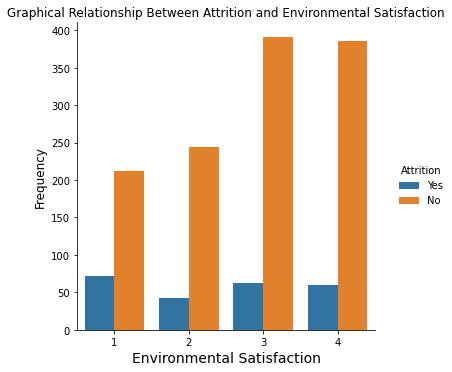

In [48]:
# a graphical representation of the relationship
sb.catplot(data = df, kind = "count", x = "EnvironmentSatisfaction", hue = "Attrition")

# defining titles for the graph using the axis_title function
axis_title(
    "Environmental Satisfaction",
    "Frequency",
    "Graphical Relationship Between Attrition and Environmental Satisfaction"
)

#### B. Work-Life Balance (WorkLifeBalance)

In [23]:
df.groupby('Attrition')['WorkLifeBalance'].value_counts().unstack(level = -1)

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


The result above doesn't tell much, so we will get the percentage value for more information

In [130]:
df.groupby('Attrition')['WorkLifeBalance'].value_counts(normalize=True).unstack(level = -1)

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,0.044607,0.231955,0.621249,0.102190
Yes,0.105485,0.244726,0.535865,0.113924


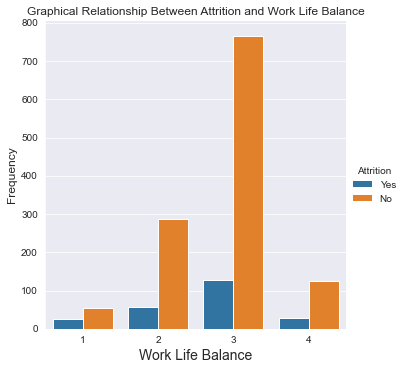

In [60]:
# a graphical representation of the relationship
sb.catplot(data = df, kind = "count", x = "WorkLifeBalance", hue = "Attrition")
# sample = df.sample()
# sb.boxplot(data=df, color="blue", x="Attrition", y="WorkLifeBalance", order = attrition_order)


# defining titles for the graph using the axis_title function
axis_title(
    "Work Life Balance",
    "Frequency",
    "Graphical Relationship Between Attrition and Work Life Balance"
)

From the graphical relationship between attrition and work life balance shows both Yes and No response experienced an increase from 1 to 3 and went down at 4. this show that attrition reduces significantly as the people experience better work life balance

### C. Age (Workforce demographics)

In [64]:
df.groupby('Attrition')["Age"].value_counts().unstack(level = -1)

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition,,,,,,,,,,,,,,,,,,,,,
No,4.0,3.0,5.0,7.0,11.0,10.0,19.0,20.0,27.0,45.0,...,17.0,15.0,17.0,18.0,19.0,11.0,4.0,9.0,10.0,5.0
Yes,4.0,6.0,6.0,6.0,5.0,4.0,7.0,6.0,12.0,3.0,...,2.0,3.0,2.0,NaN,3.0,3.0,NaN,5.0,NaN,NaN


In [65]:
df.groupby('Attrition')['Age'].value_counts(normalize=True).unstack(level = -1)

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition,,,,,,,,,,,,,,,,,,,,,
No,0.003244,0.002433,0.004055,0.005677,0.008921,0.008110,0.015410,0.016221,0.021898,0.036496,...,0.013788,0.012165,0.013788,0.014599,0.015410,0.008921,0.003244,0.007299,0.00811,0.004055
Yes,0.016878,0.025316,0.025316,0.025316,0.021097,0.016878,0.029536,0.025316,0.050633,0.012658,...,0.008439,0.012658,0.008439,NaN,0.012658,0.012658,NaN,0.021097,NaN,NaN


The data above a couple of missing values. we will proceed to using a graphical presentation of the relationship between age and attrition to really understand the data

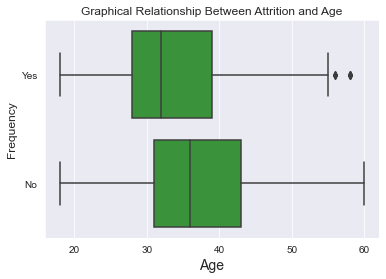

In [94]:
# a graphical representation of the relationship
# sb.pairplot(df[["Age", "Attrition"]])
# plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = "Age", y="Attrition", color = base_color)

# defining titles for the graph using the axis_title function
axis_title(
    "Age",
    "Frequency",
    "Graphical Relationship Between Attrition and Age"
)

It can be gleaned from the visualization above that the older the employees are, the more the rate of attrition decreases and vice versa for the younger employees. The shows that age plays a significant role in attrition

### 2. What is the relationship between Education and Monthly Income?

In [105]:
df[['Education', 'MonthlyIncome']]

,Education,MonthlyIncome
id,,
1,2,5993
2,1,5130
3,2,2090
4,4,2909
5,1,3468
...,...,...
1466,2,2571
1467,1,9991
1468,3,6142


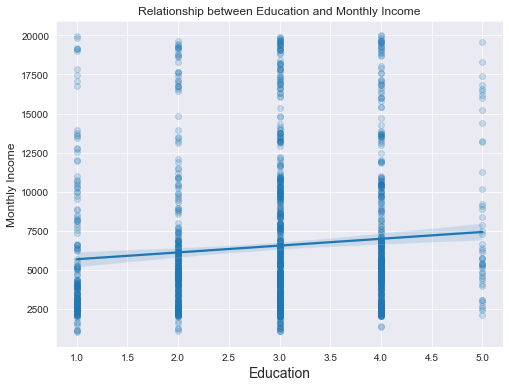

In [107]:
# Relatinship plot between both variables
plt.figure(figsize = [8, 6])
sb.regplot(
    data = df, 
    y ='MonthlyIncome', 
    x='Education', 
    scatter_kws={'alpha':0.2}
);

# Funtion definig labels and title
axis_title(
    "Education",
    "Monthly Income", 
    "Relationship between Education and Monthly Income"
)

The graph above shows that there is a gradual increase in monthly income as education increases.

### 3. What is the effect of age on attrition?

As previously observed (at C. Age (Workforce demographics)) , age has an effect on attrition. It was observed that, as the older the employees are, the more the rate of attrition decreases and vice versa for the younger employees. The box plot below demonstrates that

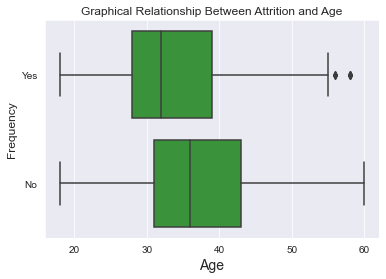

In [124]:
# a graphical representation of the relationship
# sb.pairplot(df[["Age", "Attrition"]])
# plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = "Age", y="Attrition", color = base_color)

# defining titles for the graph using the axis_title function
axis_title(
    "Age",
    "Frequency",
    "Graphical Relationship Between Attrition and Age"
)

### 4. Is Income the main factor towards employee attrition?

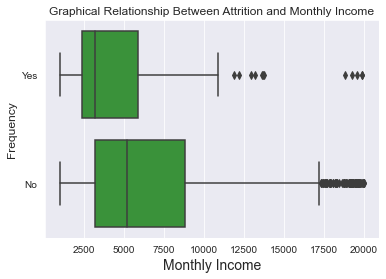

In [127]:
# a graphical representation of the relationship
# sb.pairplot(df[["Age", "Attrition"]])
# plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = "MonthlyIncome", y="Attrition", color = base_color)

# defining titles for the graph using the axis_title function
axis_title(
    "Monthly Income",
    "Frequency",
    "Graphical Relationship Between Attrition and Monthly Income"
)

The box plot shows that monthly income strongly affects attrition. at 2500, there was more attrition. As against other factors, monthly income has shown a major effect on attrition

### 5. How does work-life balance impact the overall attrition rate?

As observed previously (B. Work-Life Balance (WorkLifeBalance)), the graphical relationship between attrition and work life balance, attrition reduces significantly as the people experience better work life balance

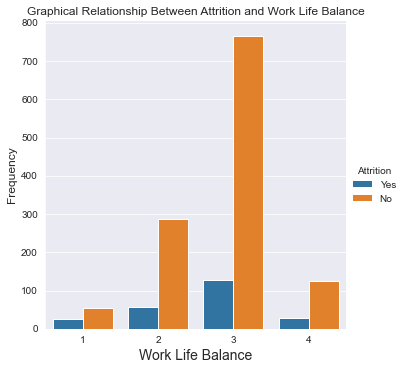

In [126]:
# a graphical representation of the relationship
sb.catplot(data = df, kind = "count", x = "WorkLifeBalance", hue = "Attrition")
# sample = df.sample()
# sb.boxplot(data=df, color="blue", x="Attrition", y="WorkLifeBalance", order = attrition_order)


# defining titles for the graph using the axis_title function
axis_title(
    "Work Life Balance",
    "Frequency",
    "Graphical Relationship Between Attrition and Work Life Balance"
)